In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset

dataset = pd.read_csv('/content/heart_disease_dataset_UCI.csv')

In [3]:
# Lets look at the top 5 rows
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Checking for null values
dataset.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
dataset.shape


(303, 14)

In [7]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


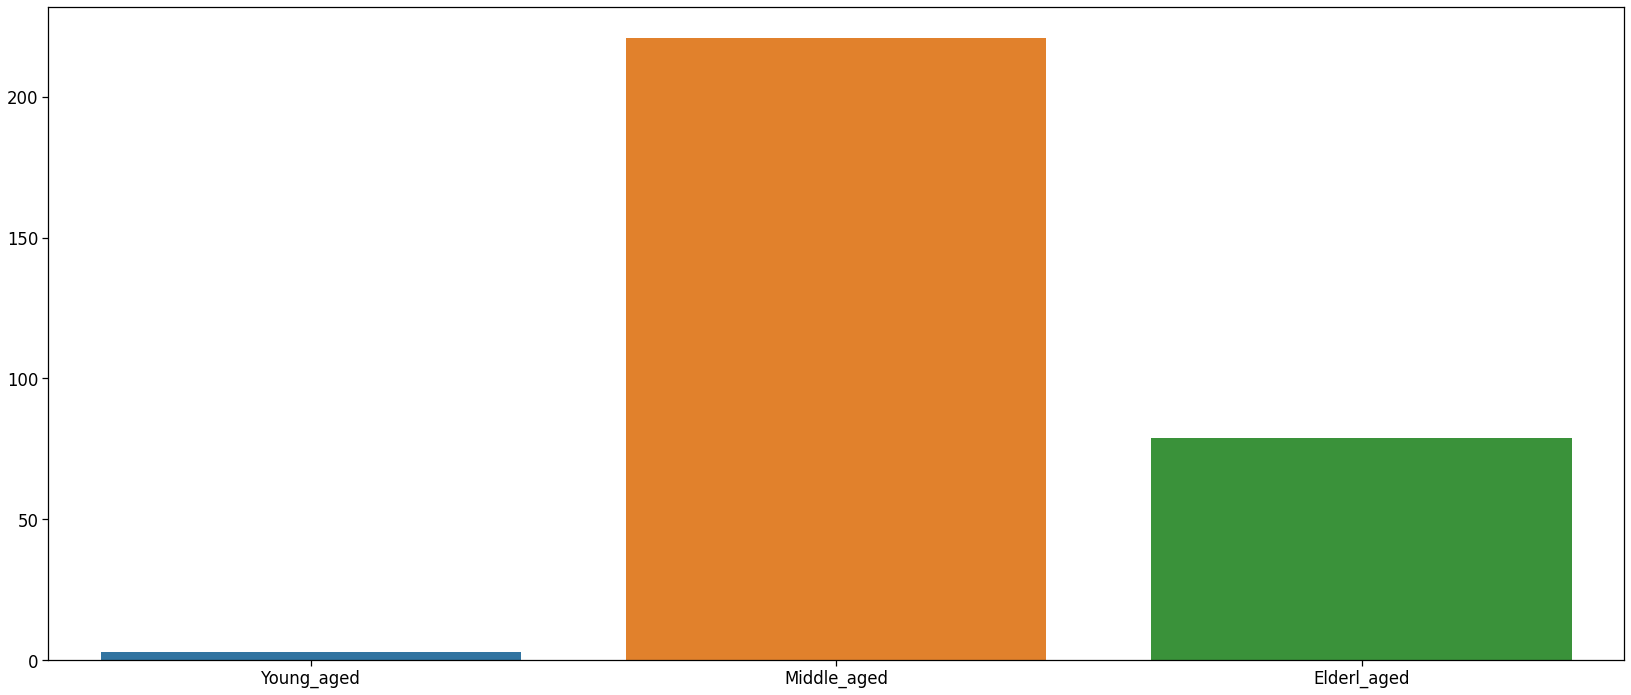

In [8]:
#frequency graph for age groups
Young_aged = dataset[(dataset.age>=18)&(dataset.age<35)]
Middle_aged = dataset[(dataset.age>=35)&(dataset.age<=60)]
Elder_aged = dataset[(dataset.age>60)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['Young_aged','Middle_aged','Elderl_aged'],y=[len(Young_aged),len(Middle_aged),len(Elder_aged)])
plt.tight_layout()

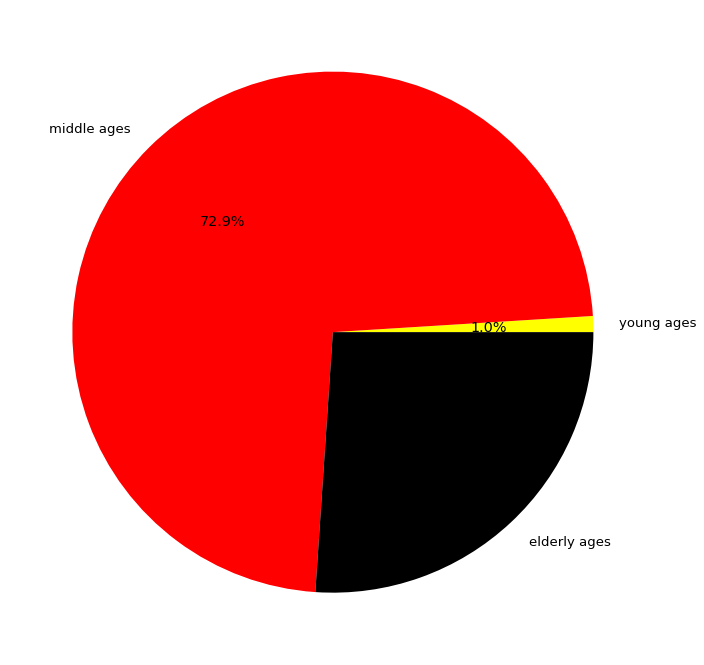

In [9]:
#pie plot for frequency of different age groups 
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young_aged),len(Middle_aged),len(Elder_aged)],labels=['young ages','middle ages','elderly ages'],colors=['yellow','red','black'], autopct='%1.1f%%')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


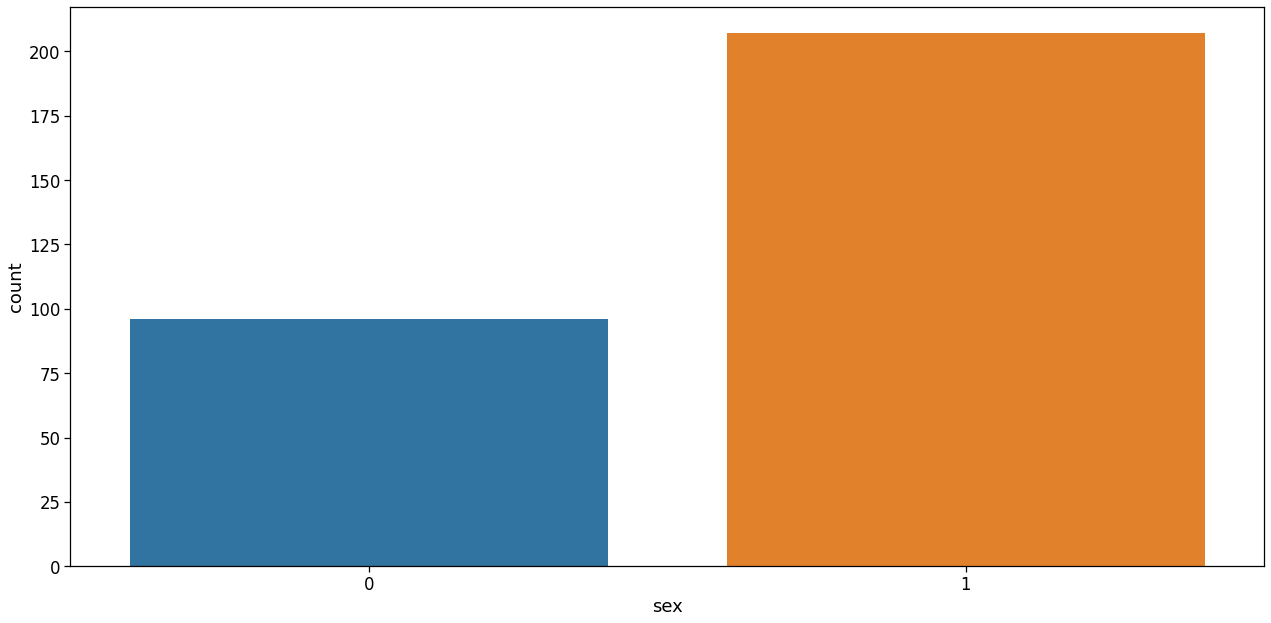

In [10]:
#frequency of male(1) and female(0)
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(dataset['sex'])
plt.tight_layout()

In [11]:
# Now lets categorize the above histogram by AGE vs TARGET

import plotly.express as px
fig = px.histogram(dataset, x="age", color="target", marginal="rug", hover_data=dataset.columns, 
                   title ="Histogram for AGE vs TARGET", 
                   labels={"age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

In [12]:
# Now lets categorize the above histogram by CHOLSETROL vs TARGET

import plotly.express as px
fig = px.histogram(dataset, x="chol", color="target", marginal="rug", hover_data=dataset.columns, 
                   title ="Histogram for CHOLESTROL vs TARGET", 
                   labels={"chol": "CHOLESTROL"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

In [13]:
# Now lets categorize the above histogram by MAX_HEARTRATE vs TARGET

import plotly.express as px
fig = px.histogram(dataset, x="thalach", color="target", marginal="rug", hover_data=dataset.columns, 
                   title ="Histogram for MAX_HEART_RATE vs TARGET", 
                   labels={"thalach": "MAX_HEART_RATE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

In [14]:
#retreiving needed datafields
x = dataset.iloc[:,0:13].values
y = dataset.iloc[:,-1].values
print(x)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]


In [15]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(x)


In [16]:
#Splitting of data into train(70%) and test(30%) cases
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_std,y, test_size = 0.3, random_state =40)

In [17]:
print(x_train)


[[-0.04040284  0.68100522  1.00257707 ... -2.27457861  0.26508221
  -0.51292188]
 [-0.26098049  0.68100522 -0.93851463 ...  0.97635214  0.26508221
  -0.51292188]
 [ 1.06248543  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 ...
 [ 1.39335191  0.68100522 -0.93851463 ... -0.64911323  2.22410436
  -0.51292188]
 [-1.1432911   0.68100522  0.03203122 ...  0.97635214 -0.71442887
   1.12302895]
 [-0.7021358   0.68100522 -0.93851463 ...  0.97635214  1.24459328
   1.12302895]]


#LOGISTIC REGRESSION

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model1=logreg.fit(x_train, y_train)

In [19]:
y_pred = logreg.predict(x_test)
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
print(ac)

0.9230769230769231


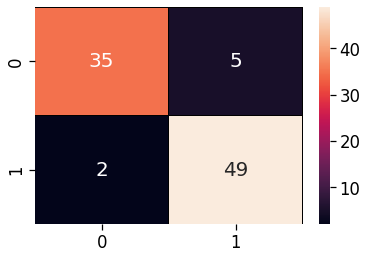

In [20]:
#Confusion matrix and recall,precision and F1-Score using classification report
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm
sns.heatmap(cm,annot=True,linewidths=0.3,linecolor='black',annot_kws={"size":20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        40
           1       0.91      0.96      0.93        51

    accuracy                           0.92        91
   macro avg       0.93      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



#RANDOM FOREST REGRESSION

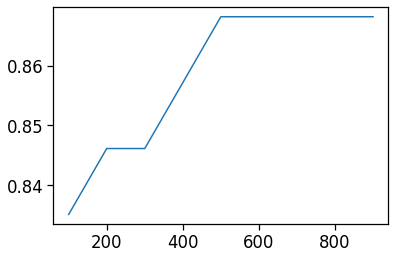

In [22]:
from sklearn.ensemble import RandomForestClassifier
list1 = []
for estimators in range(100,1000,100):
    randfor = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    randfor.fit(x_train, y_train)
    y_pred = randfor.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(100,1000,100)), list1)
plt.show()


In [23]:
#using the above graph, we take n-estimators value to be 600
rfc = RandomForestClassifier(n_estimators=600,criterion='entropy',max_depth=8,min_samples_split=5)
model2=rfc.fit(x_train,y_train)
pred1 = model2.predict(x_test)
ac = accuracy_score(y_test, pred1)
print(ac)

0.8681318681318682


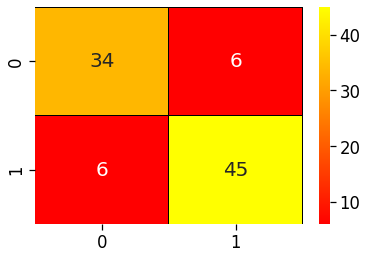

In [24]:
#Confusion matrix and recall,precision and F1-Score using classification report
cm3=confusion_matrix(y_test,pred1)
sns.heatmap(cm3,annot=True,cmap='autumn',linewidths=0.3,linecolor='black',annot_kws={"size":20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        40
           1       0.88      0.88      0.88        51

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



#TESTING THE MODELS WITH EXPLICIT TEST CASES



In [26]:
input = x_test[0]
input_as_numpy=np.asarray(input)
ipre=input_as_numpy.reshape(1,-1)
pre1=model1.predict(ipre)
pre2=model2.predict(ipre)
if (pre1==1):
    print("According to Logistic Regression model, the patient seems to be having a heart disease")
else:
    print("According to Logistic Regression model, the patient is healthy without any cardiovascular issues")
if (pre2==1):
    print("According to Random forest model, the patient seems to be having a heart disease ")
else:
    print("According to Random forest model,the patient is healthy without any cardiovascular issues")

According to Logistic Regression model, the patient seems to be having a heart disease
According to Random forest model, the patient seems to be having a heart disease 


In [27]:
input = x_test[80]
input_as_numpy=np.asarray(input)
ipre=input_as_numpy.reshape(1,-1)
pre1=model1.predict(ipre)
pre2=model2.predict(ipre)
if (pre1==1):
    print("According to Logistic Regression model, the patient seems to be having a heart disease")
else:
    print("According to Logistic Regression model, the patient is healthy without any cardiovascular issues")
if (pre2==1):
    print("According to Random forest model, the patient seems to be having a heart disease ")
else:
    print("According to Random forest model,the patient is healthy without any cardiovascular issues")

According to Logistic Regression model, the patient is healthy without any cardiovascular issues
According to Random forest model,the patient is healthy without any cardiovascular issues
